In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
ad = pd.read_csv('/Users/leon/My Drive/BU ABA/AD654/Assignment 5/ad_data.csv')
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YouTube  200 non-null    float64
 1   Spotify  200 non-null    float64
 2   Banners  200 non-null    float64
 3   Sales    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## a.

In [3]:
ad2 = ad.loc[:]
ad2['Total_Spending'] = ad2['YouTube'] + ad2['Spotify'] + ad2['Banners']

## b.

The correlation between total spending and sales is 0.87. Although it means these two variables are highly related, we cannot conclude we could have more sales with more spending because the total sales consisted of three sources: Youtube, Spotify and Banners. Each three factors might have different correlation with the sales, so it's better to seperate to three parts to realize the correlation of sales with three different channels.

The correlation between total spending and sales is: 0.87


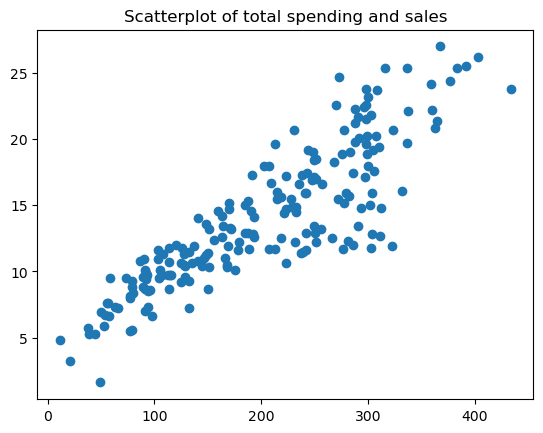

In [4]:
correlation = ad2['Total_Spending'].corr(ad2['Sales'])
plt.scatter(ad2['Total_Spending'],ad2['Sales'])
plt.title('Scatterplot of total spending and sales')
print('The correlation between total spending and sales is:', round(correlation,2))

## c.

Before using the spending in three channels to predict sales, firstly I check if three are strong correlation among three channels -- the result shows three channels are not strongly affecting each other.

In [5]:
ad2[['YouTube','Spotify','Banners']].corr()

,YouTube,Spotify,Banners
YouTube,1.000000,0.054809,0.056648
Spotify,0.054809,1.000000,0.354104
Banners,0.056648,0.354104,1.000000


## d.

The p-value of the F-statistic is 1.58e-96, which is really low, indicating that there is strong evidence that at least one of the independent variables (YouTube ad spending, Spotify ad spending, or banner ad spending) has a statistically significant impact on the dependent variable (Sales). Besides, the overall regression model is likely a good fit for the data because it explains a significant amount of the variation in the dependent variable.

After looking deeper in this model, the p-value of YouTube and Spotify is 0 -- meaning they have significant impact on Sales. However, Banners get a p-value of 0.86 -- meaning Banners does not have strong impact toward Sales.




In [6]:
X = ad2[['YouTube','Spotify','Banners']]
y = ad2['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.58e-96
Time:                        20:59:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

## e.
### i.

The p-value of all variables are 0, meaning YouTube ad spending and Spotify ad spending both have significant and independent effects on Sales. Also, the interaction between YouTube and Spotify ad spending is also highly significant and represents a combined effect beyond their individual contributions.



In [7]:
ad2['Interaction'] = ad2['YouTube'] * ad2['Spotify']
X = ad2[['YouTube','Spotify','Interaction']]
y = ad2['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          6.68e-146
Time:                        20:59:14   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7502      0.248     27.233      

### ii. 
The r-square with interaction is 0.968 -- higher than that without interaction (0.897). Since r-square indicates how well the model fits the data, it is clear to see the model performs better when considering the interaction between YouTube and Spotify ad spending.

In [8]:
X = ad2[['YouTube','Spotify']]
y = ad2['Sales']
X = sm.add_constant(X)
model_nointeraction = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          6.68e-146
Time:                        20:59:14   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7502      0.248     27.233      

### iii.

With spending 150 on YouTube and 30 on Spotify, the Sales prediction (by using the model with interaction) is: 1,142.98

In [9]:
YouTube = 150
Spotify = 30

input_data = pd.DataFrame({'YouTube': [YouTube],
                           'Spotify': [Spotify],
                           'Interaction': [YouTube * Spotify],
                           'const': [1]})

# Use the model to make predictions
predicted_sales = model.predict(input_data)

# Print the predicted sales outcome
print("Predicted Sales:", round(predicted_sales.iloc[0],2))


Predicted Sales: 1142.98


### iiii.

In marketing terms, the interaction between YouTube and Spotify ad spending suggests that when you invest in both YouTube and Spotify ads simultaneously, their effectiveness in driving sales is not just additive but can create a synergy that leads to a greater boost in sales than using either platform alone. It highlights the importance of considering the joint influence of these advertising channels for optimizing marketing strategies and maximizing sales outcomes.

## f.

I create an example involving an interaction term in a model. Imagine a marketing campaign where the two main variables are "Advertisement Type" (online ads vs. traditional media ads) and "Discount Offered" (low vs. high). The outcome variable I am interested in is "Sales Increase.

In this scenario, the interaction term is the combination of "Advertisement Type" and "Discount Offered." It might turn out that online ads combined with a high discount lead to a significantly larger increase in sales than any other combination. This interaction effect is positive, as it enhances sales more than the sum of its parts.

My reaction to this interaction is not surprise. It makes intuitive sense: online ads, which often have a more targeted reach, combined with attractive discounts, can be a powerful driver for consumer purchases. This synergy illustrates the importance of considering how different marketing strategies can complement each other, rather than just assessing them in isolation.